In [1]:
import numpy as np
import random
import scipy.stats as ss 

In [2]:
p1 = np.array([1,1])
p2 = np.array([4,4])

In [3]:
def distance(p1, p2):
    '''Find the distance between point p1 and p2.'''

    return np.sqrt(np.sum(np.power(p2 - p1, 2)))

In [4]:
distance(p1, p2)

4.242640687119285

In [5]:
def majority_vote(votes):
    '''Returns the most common element in votes.'''
    
    vote_counts = {}
    for vote in votes:
        if vote in vote_counts:
            vote_counts[vote] += 1
        else:
            vote_counts[vote] = 1
    
    max_count = max(vote_counts.values())
    winners = []
    for vote, count in vote_counts.items():
        if count == max_count:
            winners.append(vote)

    return random.choice(winners)

In [6]:
votes = [1,2,3,1,2,3,3,3,3,3]

In [7]:
def majority_vote_short(votes):
    '''Returns the most common element in votes.'''

    mode, count = ss.mstats.mode(votes)

    return mode

majority_vote_short(votes)

array([3.])

In [8]:
points = np.array([[1,1], [1,2], [1,3], [2,1], [2,2], [2,3], [3,1], [3,2], [3,3]])

In [9]:
p = np.array([2.5, 2])

In [10]:
import matplotlib.pyplot as plt

(0.5, 3.5, 0.5, 3.5)

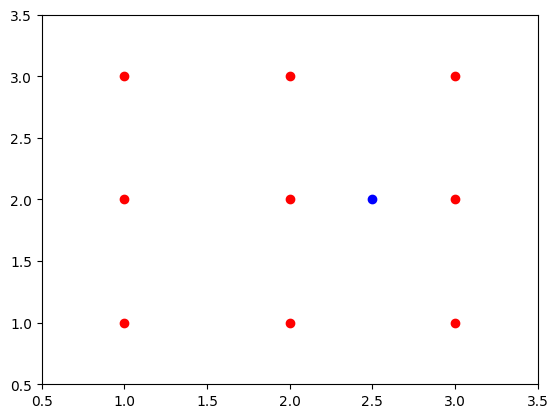

In [11]:
plt.plot(points[:, 0], points[:, 1], "ro");
plt.plot(p[0], p[1], "bo");
plt.axis([0.5, 3.5, 0.5, 3.5])

In [12]:
def find_nearest_neighbors(p, points, k=5):
    '''Find the k nearest neighbors of point p and return their indices'''
    distances = np.zeros(points.shape[0])
    
    for i in range(len(distances)):
        distances[i] = distance(p, points[i])

    ind = np.argsort(distances)
    return ind[:k]

In [13]:
ind = find_nearest_neighbors(p, points, 2)
print(points[ind])

[[2 2]
 [3 2]]


In [14]:
def knn_predict(p, points, outcomes, k):
    ind = find_nearest_neighbors(p, points, k)
    return majority_vote(outcomes[ind])
    

In [15]:
outcomes = np.array([0,0,0,0,1,1,1,1,1])
knn_predict(np.array([2.5, 2.7]), points, outcomes, k=2)

1

In [16]:
n = 5
def generate_synth_data(n=50):
    '''Creates two sets of points from bivariate normal distributions.'''
    points = np.concatenate((ss.norm(0,1).rvs((n,2)), ss.norm(1,1).rvs((n,2))), axis = 0)
    outcomes = np.concatenate((np.repeat(0, n), np.repeat(1, n)), axis = 0)

    return (points, outcomes)


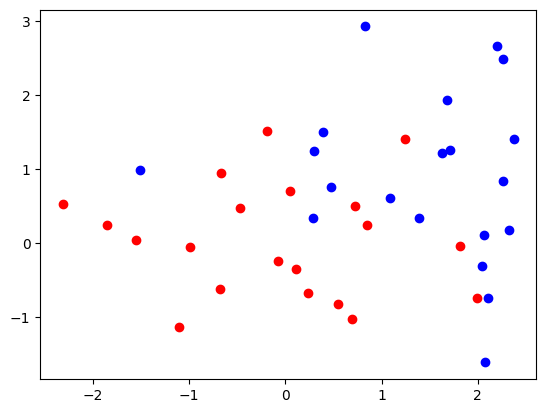

In [17]:
n = 20
(points, outcomes) = generate_synth_data(n)
plt.plot(points[:n, 0], points[:n, 1], "ro")
plt.plot(points[n:, 0], points[n:, 1], "bo");


In [18]:
def make_prediction_grid(predictors, outcomes, limits, h, k):
    '''Classify each point on the prediction grid.'''

    (x_min, x_max, y_min, y_max) = limits
    xs = np.arange(x_min, x_max, h)
    ys = np.arange(y_min, y_max, h)
    # meshgrid takes 2 1-dimensional arrays (x and y) and returs 2 2-dimensional arrays:
    # xx contains the x values of all the points of the grid
    # yy contains the y values of all the points of the grid
    xx, yy = np.meshgrid(xs, ys)

    prediction_grid = np.zeros(xx.shape, dtype = int)
    # enumerate is used with sequences of which we need both the elements and thier indexes. It returs a tuple with (index, element)
    for i,x in enumerate(xs):
        for j,y in enumerate(ys):
            p = np.array([x,y])
            # Given that j = y and i = x, we assign j to the rows and x to the columns
            prediction_grid[j, i] = knn_predict(p, predictors, outcomes, k)

    return (xx, yy, prediction_grid)

In [19]:
def plot_prediction_grid (xx, yy, prediction_grid):
    """ Plot KNN predictions for every point on the grid."""
    from matplotlib.colors import ListedColormap
    background_colormap = ListedColormap (["hotpink","lightskyblue", "yellowgreen"])
    observation_colormap = ListedColormap (["red","blue","green"])
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors[:,0], predictors [:,1], c = outcomes, cmap = observation_colormap, s = 50)
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2')
    plt.xticks(())
    plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))

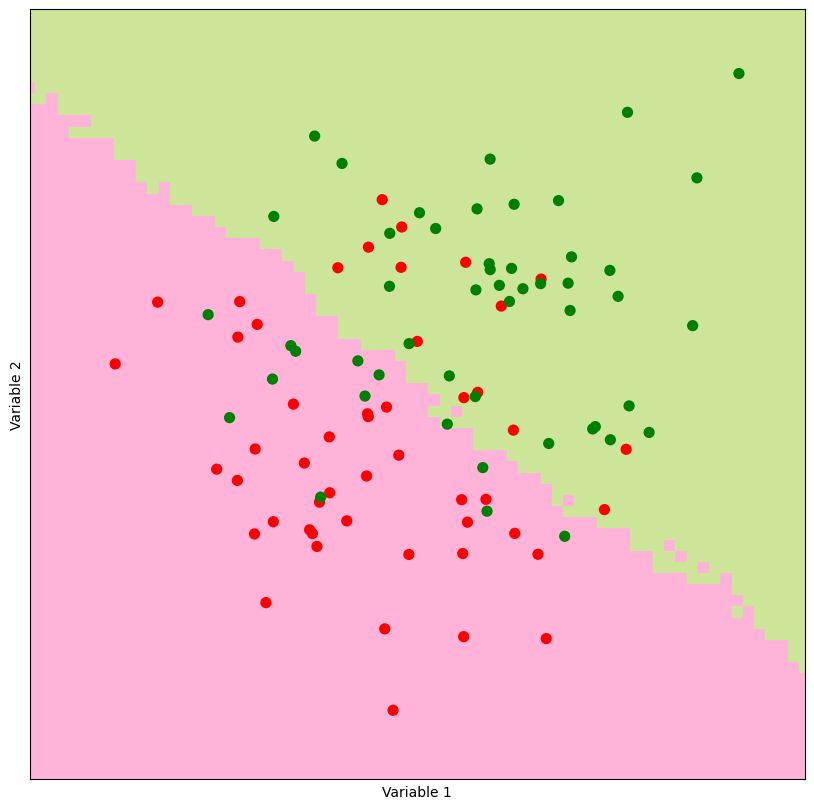

In [20]:
(predictors, outcomes) = generate_synth_data()
k = 50
limits = (-3, 4, -3, 4)
h = 0.1
(xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid(xx, yy, prediction_grid);

In [21]:
from sklearn import datasets
iris = datasets.load_iris()

In [22]:
predictors = iris.data[:, 0:2]
outcomes = iris.target

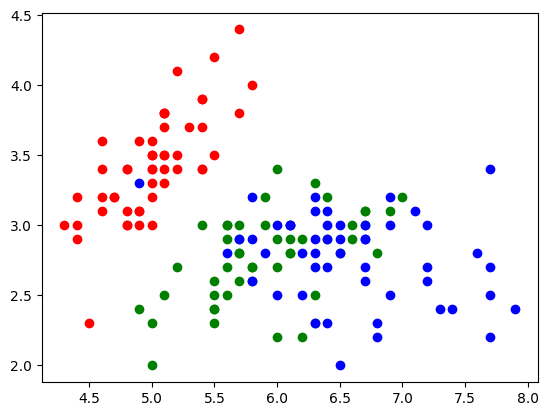

In [23]:
plt.plot(predictors[outcomes == 0][:, 0], predictors[outcomes == 0][:, 1], "ro")
plt.plot(predictors[outcomes == 1][:, 0], predictors[outcomes == 1][:, 1], "go")
plt.plot(predictors[outcomes == 2][:, 0], predictors[outcomes == 1][:, 1], "bo");

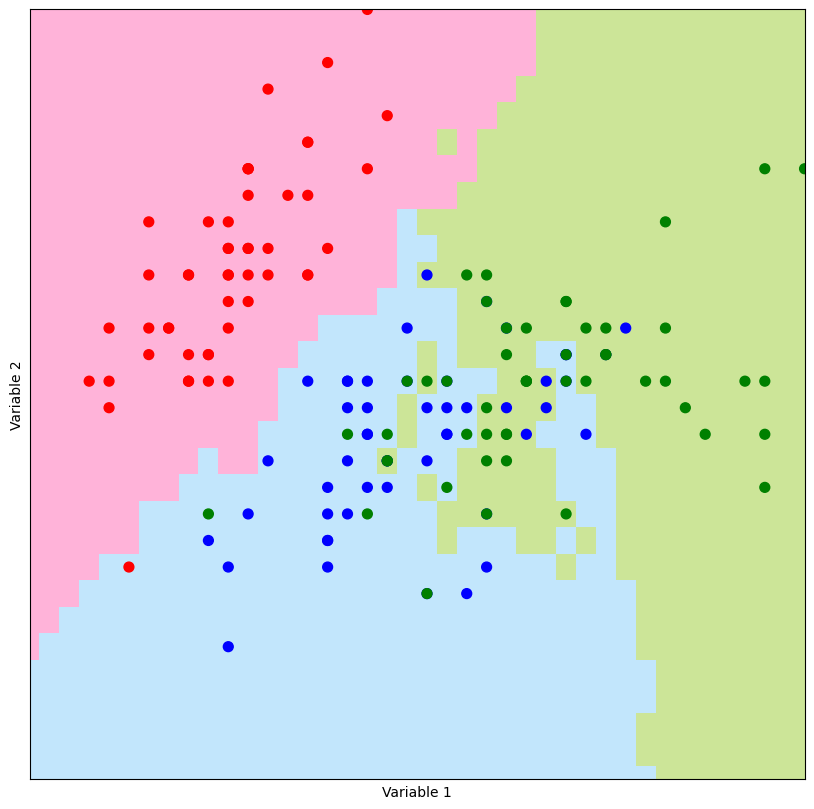

In [24]:
k = 5
limits = (4, 8, 1.5, 4.5)
h = 0.1
(xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid(xx, yy, prediction_grid);

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [27]:
knn.fit(predictors, outcomes)
sk_predictions = knn.predict(predictors)
sk_predictions.shape

(150,)

In [28]:
my_predictions = np.array([knn_predict(p, predictors, outcomes, 5) for p in predictors])
my_predictions.shape

(150,)

In [29]:
print(100 * np.mean(sk_predictions == my_predictions))
print(100 * np.mean(sk_predictions == outcomes))
print(100 * np.mean(my_predictions == outcomes))

97.33333333333334
83.33333333333334
84.66666666666667
